## Filtering drug response curves

Tasks:
    1. propose and check filtering criteria
    2. visualise filtering results
    3. Generate figures for the final report and presentation

From first EDA there are many drug respomse curve that do not have expected sigmoid shape

**Proposed function for Filtering_curves**
(df, response_columns, filtering_scenario = [1,2,3], first_columns_to_compare = [1, 2], last_columns_to_compare = [-1, -2], tolerance=0.05, first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)

filtering_scenario = [1,2,3]
1. Ensure that all the response are less than 1

2. Ensure that first and last points form a plateu
the minimal number of points are specified in the function arguments
by default, two points for both lpateus are considered
tolerance =0.05 values to ensure the points form a plateu
first_columns_to_compare = [1, 2]  - first two columns for plateu
last_columns_to_compare = [-1, -2] - last two columns for plateu

3. Specify location of the plateus - first_points_lower_limit and last_points_upper_limit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
_FOLDER = "data/"
_FOLDER_2 = "figures/"

In [2]:
def FilteringCurves(df, response_columns, filtering_scenario = [1,2,3], first_columns_to_compare = [1, 2], last_columns_to_compare = [-1, -2],
             tolerance=0.05, first_points_lower_limit = 0.8, last_points_upper_limit = 0.4):
    """
    filtering_scenario = [1,2,3]
    1. Ensure that all the response are less than 1
    
    2. Ensure that first and last points form plateus
    the minimal number of points are specified in the function arguments
    by default, two points for both lpateus are considered
    tolerance =0.05 values to ensure the points form a plateu
    first_columns_to_compare = [1, 2]  - first two columns for plateu
    last_columns_to_compare = [-1, -2] - last two columns for plateu
    
    3. Specify location of the plateus - first_points_lower_limit and last_points_upper_limit
    
    """
    df = df.copy()
    print("Original dataset:", df.shape)
    
    for i in filtering_scenario:
        if i ==1:
            #1st filtering
            index_row_more_than_1 = []
            for col in response_columns:
                if sum(df[col]>1)>0:
                    index_row_more_than_1.extend(df[df[col]>1].index)
        
            index_row_less_than_1 = set(df.index) - set(index_row_more_than_1)
            df = df.loc[index_row_less_than_1, :].copy()
            print("1st filtration (Ensure that all the response are less than 1): Filtered dataset:", df.shape)
        elif i== 2: 
            #2nd filtering
            df["dif_first"]=abs(df[response_columns[first_columns_to_compare[0]-1]]\
                                     - df[response_columns[first_columns_to_compare[1]-1]])
            df["dif_last"]=abs(df[response_columns[last_columns_to_compare[0]]] \
                                        - df[response_columns[last_columns_to_compare[1]]])

            df = df[(df["dif_first"]<= tolerance)
                           &(df["dif_last"]<= tolerance)]
    
            print("2d filtration (Ensure that first and last points form plateus): Filtered dataset:", df.shape)
        elif i== 3: 
                #3d filtering
                df = df[(df[response_columns[1]]>first_points_lower_limit) 
                         & (df[response_columns[-1]]<last_points_upper_limit)]
                print("3d stage filtration (Specified location of the plateus): Filtered dataset:", df.shape)
        else:
            print("Unknown filtration scenario")
    
    return df
    
def ShowResponseCurves(df, plots_in_row, plots_in_column, x_columns, y_columns, start_index=0, indexes=[]):
 
                
    fig = plt.figure(figsize=(14, 11))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    n_plots= plots_in_row*plots_in_column
    
    if len(indexes) ==0:
        indexes =df.index[start_index : start_index+n_plots]

    for i, ind in list(enumerate(indexes)):
        x = df.loc[ind, x_columns]
        y = df.loc[ind, y_columns]
                
        ax = fig.add_subplot(plots_in_row, plots_in_column, i+1)
        ax.scatter(x,y)
        ax.set_title(str(df.loc[ind, "DRUG_ID"])+"_"+str(df.loc[ind, "COSMIC_ID"]))
        ax.set_xlabel("Scaled dosage")
        ax.set_ylabel("Normalised response")
        

### Original data

In [3]:
drug_curves = pd.read_csv(_FOLDER+"normalised_dose_response_data.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]

drug_curves.shape

/Users/Marina/anaconda3/envs/myspark/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (28,30,31,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(225384, 44)

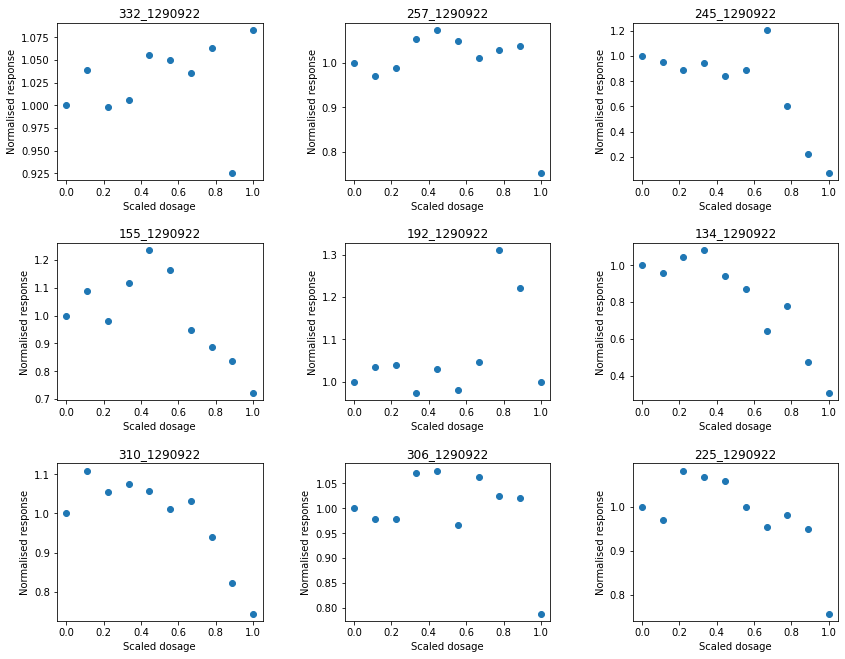

In [4]:
ShowResponseCurves(drug_curves, plots_in_row=3, plots_in_column=3, \
                   x_columns=conc_columns, y_columns=response_norm, indexes=drug_curves.index[:9])

### Figure for the report - Example of Invalid raw data

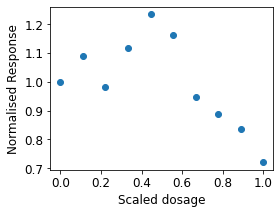

In [5]:
plt.figure(figsize=(4,3))
ind = drug_curves.index[3]
x = drug_curves.loc[ind, conc_columns]
y = drug_curves.loc[ind, response_norm]
plt.scatter(x, y)
plt.tick_params(labelsize=12)
plt.xlabel("Scaled dosage", fontsize=12)
plt.ylabel("Normalised Response", fontsize=12);
plt.savefig(_FOLDER_2+"filt0.png", bbox_inches='tight')

### Filtered data

**Filtering_curves**
(df, response_columns, filtering_scenario = [1,2,3], first_columns_to_compare = [1, 2], last_columns_to_compare = [-1, -2], tolerance=0.05, first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)

filtering_scenario = [1,2,3]
1. Ensure that all the response are less than 1

2. Ensure that first and last points form a plateu
the minimal number of points are specified in the function arguments
by default, two points for both lpateus are considered
tolerance =0.05 values to ensure the points form a plateu
first_columns_to_compare = [1, 2]  - first two columns for plateu
last_columns_to_compare = [-1, -2] - last two columns for plateu

3. Specify location of the plateus - first_points_lower_limit and last_points_upper_limit

### Filtering scenario 1

In [6]:
df = FilteringCurves(drug_curves, filtering_scenario=[1], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)

Original dataset: (225384, 44)
1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)


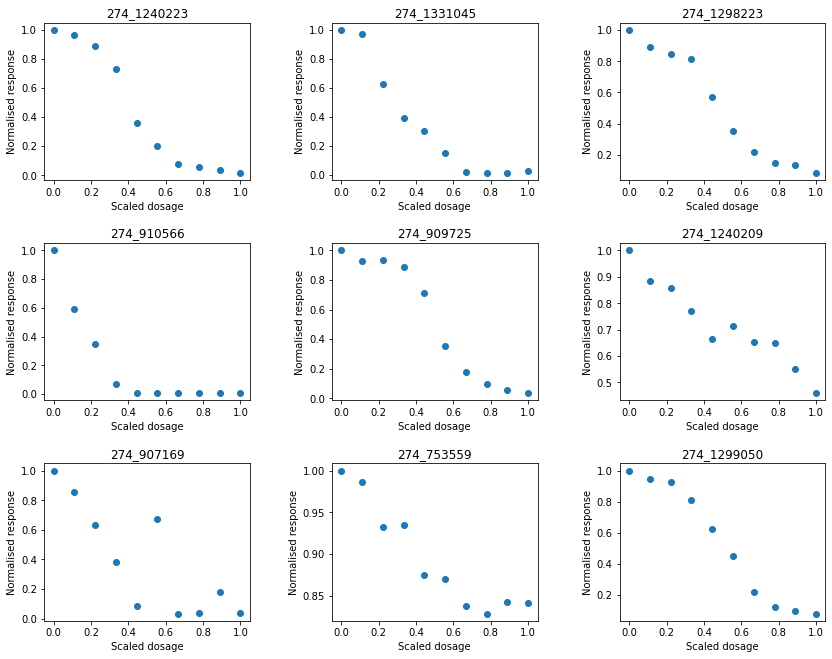

In [7]:
df2 = df[df["DRUG_ID"]==274]

ShowResponseCurves(drug_curves, plots_in_row=3, plots_in_column=3, \
                   x_columns=conc_columns, y_columns=response_norm, indexes=df2.index[:9])

### Figure for the report - Results of filtraion: Sigmoid and Linear trends

### Example of Valid Curves

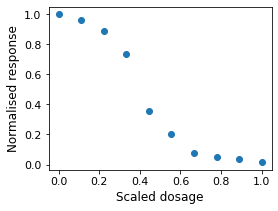

In [8]:
plt.figure(figsize=(4,3))
# Belinostat
ind = df[(df["DRUG_ID"]==274) &(df["COSMIC_ID"]==1240223)].index
x = df.loc[ind, conc_columns]
y = df.loc[ind, response_norm]
plt.scatter(x, y)
plt.tick_params(labelsize=11)
plt.xlabel("Scaled dosage", fontsize=12)
plt.ylabel("Normalised response", fontsize=12);
plt.savefig(_FOLDER_2+"filt_Fig1a.png", bbox_inches='tight')

### Example of Not good response (No plateus)

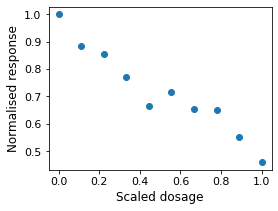

In [9]:
plt.figure(figsize=(4,3))
# Belinostat
ind = df[(df["DRUG_ID"]==274) &(df["COSMIC_ID"]==1240209)].index
x = df.loc[ind, conc_columns]
y = df.loc[ind, response_norm]
plt.scatter(x, y)
plt.tick_params(labelsize=11)
plt.xlabel("Scaled dosage", fontsize=12)
plt.ylabel("Normalised response", fontsize=12);
plt.savefig(_FOLDER_2+"filt_Fig1b.png", bbox_inches='tight')

### Filtering scenario 1+2 

In [10]:
df = FilteringCurves(drug_curves, filtering_scenario=[1, 2], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)

Original dataset: (225384, 44)
1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
2d filtration (Ensure that first and last points form plateus): Filtered dataset: (6321, 46)


### Figures for the report - Invalid data left after filtration

Presence of "plateus, when difference between points is in the specified range, but min response is >0.8

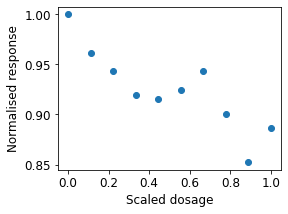

In [11]:
plt.figure(figsize=(4,3))
ind = df[(df["DRUG_ID"]==171) &(df["COSMIC_ID"]== 753551)].index
ind = df.index[10]
x = df.loc[ind, conc_columns]
y = df.loc[ind, response_norm]
plt.scatter(x, y)
plt.tick_params(labelsize=12)
plt.xlabel("Scaled dosage", fontsize=12)
plt.ylabel("Normalised response", fontsize=12);
plt.savefig(_FOLDER_2+"filt2_1.png", bbox_inches='tight')

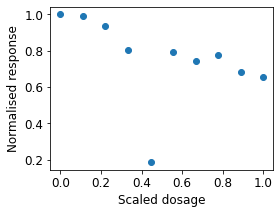

In [12]:
plt.figure(figsize=(4,3))
ind = df[(df["DRUG_ID"]==190) &(df["COSMIC_ID"]==908128)].index
# ind = df.index[1]
x = df.loc[ind, conc_columns]
y = df.loc[ind, response_norm]
plt.scatter(x, y)
plt.tick_params(labelsize=12)
plt.xlabel("Scaled dosage", fontsize=12)
plt.ylabel("Normalised response", fontsize=12);
plt.savefig(_FOLDER_2+"filt2_2.png", bbox_inches='tight')

### Filtering scenario 1+2+3

Original dataset: (225384, 44)
1st filtration (Ensure that all the response are less than 1): Filtered dataset: (63325, 44)
2d filtration (Ensure that first and last points form plateus): Filtered dataset: (6321, 46)
3d stage filtration (Specified location of the plateus): Filtered dataset: (2776, 46)


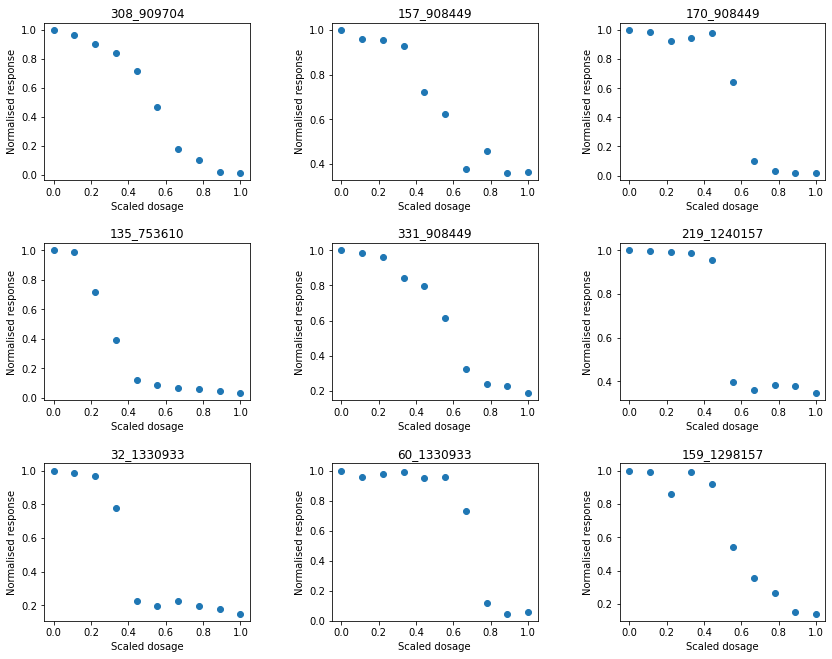

In [13]:
df = FilteringCurves(drug_curves, filtering_scenario=[1,2,3], \
                        response_columns = response_norm, \
                        first_points_lower_limit = 0.8, last_points_upper_limit = 0.4)

ShowResponseCurves(df, plots_in_row=3, plots_in_column=3, \
                   x_columns=conc_columns, y_columns=response_norm, indexes=df.index[:9])

### Figures for the report - final data

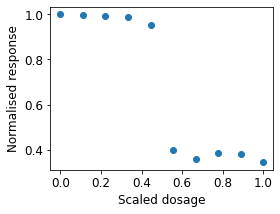

In [14]:
plt.figure(figsize=(4,3))
# ind = df[(df["DRUG_ID"]==274) &(df["COSMIC_ID"]==1240223)].index
ind = df[(df["DRUG_ID"]==219) &(df["COSMIC_ID"]==1240157)].index
x = df.loc[ind, conc_columns]
y = df.loc[ind, response_norm]
plt.scatter(x, y)
plt.tick_params(labelsize=12)
plt.xlabel("Scaled dosage", fontsize=12)
plt.ylabel("Normalised response", fontsize=12);
plt.savefig(_FOLDER_2+"filt3.png", bbox_inches='tight')